## Markowitz Portfolio Optimization:

#### Introduction

Markowitz Portfolio Optimization, developed by Harry Markowitz in 1952, is a fundamental theory in modern finance and investment management. It provides a framework for constructing a portfolio of assets that maximizes expected return for a given level of risk, or equivalently, minimizes risk for a given level of expected return. This theory is the cornerstone of Modern Portfolio Theory (MPT).

### The Basics of Portfolio Theory

#### Expected Return

The expected return of a portfolio is the weighted average of the expected returns of the individual assets in the portfolio. If a portfolio consists of $ n $ assets, the expected return $ E(R_p) $ is given by:

$$ E(R_p) = \sum_{i=1}^n w_i E(R_i) $$

where $ w_i $ is the weight of asset $ i $ in the portfolio, and $ E(R_i) $ is the expected return of asset $ i $.

#### Portfolio Variance

The risk of a portfolio is measured by its variance or standard deviation. The portfolio variance $ \sigma_p^2 $ is given by:

$$ \sigma_p^2 = \sum_{i=1}^n \sum_{j=1}^n w_i w_j \sigma_{ij} $$

where $ \sigma_{ij} $ is the covariance between the returns of asset $ i $ and asset $ j $.

#### Efficient Frontier

The efficient frontier is a set of optimal portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk they carry.

### The Markowitz Optimization Problem

The optimization problem can be formulated as either maximizing the expected return for a given level of risk or minimizing the risk for a given level of expected return. The mathematical formulation is:

1. **Maximize Expected Return for Given Risk:**

$$ \max_{w} E(R_p) = \sum_{i=1}^n w_i E(R_i) $$
$$ \text{subject to} \quad \sigma_p^2 = \sum_{i=1}^n \sum_{j=1}^n w_i w_j \sigma_{ij} \leq \sigma^2 $$
$$ \sum_{i=1}^n w_i = 1 $$
$$ w_i \geq 0 \quad \forall i $$

2. **Minimize Risk for Given Expected Return:**

$$ \min_{w} \sigma_p^2 = \sum_{i=1}^n \sum_{j=1}^n w_i w_j \sigma_{ij} $$
$$ \text{subject to} \quad E(R_p) = \sum_{i=1}^n w_i E(R_i) \geq E(R) $$
$$ \sum_{i=1}^n w_i = 1 $$
$$ w_i \geq 0 \quad \forall i $$

### Solution Methods

#### Quadratic Programming

Markowitz portfolio optimization involves solving a quadratic programming problem due to the quadratic nature of the risk (variance) function. Quadratic programming solvers, such as those available in optimization software like MATLAB, R, and Python, can be used to find the optimal weights.

#### Numerical Methods

In cases where analytical solutions are difficult to derive, numerical methods such as the Newton-Raphson method or gradient descent can be employed to find the optimal portfolio weights.

### Practical Considerations

#### Constraints

In real-world applications, additional constraints may be considered, such as:

- **Budget Constraints:** Ensuring that the sum of the weights equals one.
- **Non-negativity Constraints:** Restricting short selling by ensuring all weights are non-negative.
- **Transaction Costs:** Including costs associated with buying and selling assets.

### Data Inputs

Accurate estimation of expected returns, variances, and covariances is critical. Historical data is often used, but forward-looking estimates can be more relevant.

### Extensions and Variations

#### Mean-Variance Optimization

Markowitz's original framework is often referred to as mean-variance optimization, which focuses on the trade-off between expected return (mean) and risk (variance).

#### Multi-Period Models

Extensions of the Markowitz model consider multi-period investment horizons, accounting for changes in investment opportunities over time.

#### Robust Optimization

To address estimation errors and uncertainties in input data, robust optimization techniques can be used. These techniques seek to construct portfolios that perform well under a variety of scenarios.

#### Conclusion

Markowitz Portfolio Optimization remains a foundational concept in finance, providing a systematic approach to portfolio construction. While the basic principles are straightforward, practical implementation requires careful consideration of various factors, including estimation of inputs, computational methods, and real-world constraints. As investment landscapes evolve, the principles of diversification and efficient frontier continue to guide investors in making informed decisions to achieve their financial goals.

Let's install yahoo finance to download historical datasets

```pip install yfinance```

In [1]:
# Load Packages
import math
import numpy as np
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
import yfinance as yf

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Read Data
startdt = datetime(2021, 1, 1)
enddt = datetime(2021, 12, 31)

test = yf.download(['META', 'GOOGL'], start=startdt, end=enddt)
test.head()

[*********************100%%**********************]  2 of 2 completed


Adj Close                  Close                   High  \
                GOOGL        META      GOOGL        META      GOOGL   
Date                                                                  
2021-01-04  86.306503  268.654968  86.306503  268.940002  88.124496   
2021-01-05  87.002502  270.682800  87.002502  270.970001  87.341499   
2021-01-06  86.143997  263.030914  86.143997  263.309998  87.198502   
2021-01-07  88.717003  268.455170  88.717003  268.739990  88.890999   
2021-01-08  89.891502  267.286407  89.891502  267.570007  89.968002   

                              Low                   Open              \
                  META      GOOGL        META      GOOGL        META   
Date                                                                   
2021-01-04  275.000000  85.357002  265.200012  88.000000  274.779999   
2021-01-05  272.399994  85.845001  268.209991  86.254501  268.290009   
2021-01-06  267.750000  84.805000  260.010010  85.013000  262.000000   
2021-01-07  271.609985  86.337997  264.779999  86.337997  265.899994   
2021-01-08  268.950012  88.060997  263.179993  88.858002  268.309998   

              Volume            
               GOOGL      META  
Date                            
2021-01-04  37324000  15106100  
2021-01-05  20360000   9871600  
2021-01-06  46588000  24354100  
2021-01-07  41936000  15789800  
2021-01-08  35484000  18528300

In [6]:
# Closing price
test = test['Adj Close']
test.shape

(251, 2)

In [7]:
test.head()

,GOOGL,META
Date,,
2021-01-04,86.306503,268.654968
2021-01-05,87.002502,270.682800
2021-01-06,86.143997,263.030914
2021-01-07,88.717003,268.455170
2021-01-08,89.891502,267.286407


In [8]:
google = test['GOOGL'].pct_change().apply(lambda x: np.log(1+x))
google.head()

Date
2021-01-04         NaN
2021-01-05    0.008032
2021-01-06   -0.009917
2021-01-07    0.029431
2021-01-08    0.013152
Name: GOOGL, dtype: float64

In [9]:
math.log(87.002502) - math.log(86.306503)

0.008031928192988147

In [10]:
var_goggle = google.var()
var_goggle

0.0002326982203170642

In [11]:
fb = test['META'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

Date
2021-01-04         NaN
2021-01-05    0.007520
2021-01-06   -0.028676
2021-01-07    0.020412
2021-01-08   -0.004363
Name: META, dtype: float64

In [12]:
var_fb = fb.var()
var_fb

0.0003456657909360007

In [13]:
fb_vol = np.sqrt(var_fb * 250)
fb_vol

0.29396674596627453

<AxesSubplot:>

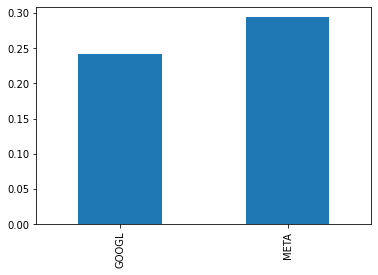

In [14]:
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [15]:
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

,GOOGL,META
Date,,
2021-01-04,NaN,NaN
2021-01-05,0.008032,0.007520
2021-01-06,-0.009917,-0.028676
2021-01-07,0.029431,0.020412
2021-01-08,0.013152,-0.004363


In [16]:
test1['GOOGL'].cov(test1['META'])

0.00016531141861164997

In [17]:
test1['GOOGL'].corr(test1['META'])

0.5828786139524442

In [18]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

,GOOGL,META
Date,,
2021-01-04,NaN,NaN
2021-01-05,0.008032,0.007520
2021-01-06,-0.009917,-0.028676
2021-01-07,0.029431,0.020412
2021-01-08,0.013152,-0.004363


In [19]:
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

GOOGL    0.002108
META     0.000989
dtype: float64

In [20]:
e_r = (e_r_ind*w).sum()
e_r

0.0012126966476177228

In [21]:
df = yf.download(['TCS.NS', 'INFY.NS', 'ICICIBANK.NS', 'TATAMOTORS.NS'],
                 start=datetime(2016, 1, 1), end=datetime(2020,12,31))
df.head()

[*********************100%%**********************]  4 of 4 completed


Adj Close                                               Close  \
           ICICIBANK.NS     INFY.NS TATAMOTORS.NS       TCS.NS ICICIBANK.NS   
Date                                                                          
2016-01-01   226.929855  455.436249    400.489105  1016.664185   239.090912   
2016-01-04   220.501617  444.578247    375.726318   996.973633   232.318176   
2016-01-05   221.493881  442.579712    373.135468   988.285706   233.363632   
2016-01-06   215.799072  440.642914    364.615479  1002.022461   227.363632   
2016-01-07   212.908478  432.999207    342.343933   997.667969   224.318176   

                                                          High              \
               INFY.NS TATAMOTORS.NS       TCS.NS ICICIBANK.NS     INFY.NS   
Date                                                                         
2016-01-01  552.625000    401.899994  1208.199951   239.636368  554.474976   
2016-01-04  539.450012    377.049988  1184.800049   237.590912  551.224976   
2016-01-05  537.025024    374.450012  1174.474976   234.090912  542.750000   
2016-01-06  534.674988    365.899994  1190.800049   233.409088  537.325012   
2016-01-07  525.400024    343.549988  1185.625000   225.181824  533.950012   

            ...           Low                      Open              \
            ... TATAMOTORS.NS       TCS.NS ICICIBANK.NS     INFY.NS   
Date        ...                                                       
2016-01-01  ...    373.000000  1206.125000   237.545456  550.000000   
2016-01-04  ...    375.049988  1183.025024   237.272720  549.974976   
2016-01-05  ...    372.100006  1170.500000   232.954544  542.750000   
2016-01-06  ...    364.600006  1175.099976   232.181824  537.325012   
2016-01-07  ...    338.100006  1180.000000   224.000000  530.025024   

                                            Volume                         \
           TATAMOTORS.NS       TCS.NS ICICIBANK.NS  INFY.NS TATAMOTORS.NS   
Date                                                                        
2016-01-01    392.500000  1219.500000      5998096  1806550       4377363   
2016-01-04    400.000000  1205.074951      9435792  3975362       7822660   
2016-01-05    381.049988  1192.500000      8966977  4949786       6901068   
2016-01-06    374.250000  1175.099976     17416181  5588328       7211230   
2016-01-07    356.250000  1185.000000     18240712  5294088      11782307   

                     
             TCS.NS  
Date                 
2016-01-01   712262  
2016-01-04  1870184  
2016-01-05  2678020  
2016-01-06  2653228  
2016-01-07  3199580  

[5 rows x 24 columns]

In [22]:
# Closing price
df = df['Adj Close']
df.head()

,ICICIBANK.NS,INFY.NS,TATAMOTORS.NS,TCS.NS
Date,,,,
2016-01-01,226.929855,455.436249,400.489105,1016.664185
2016-01-04,220.501617,444.578247,375.726318,996.973633
2016-01-05,221.493881,442.579712,373.135468,988.285706
2016-01-06,215.799072,440.642914,364.615479,1002.022461
2016-01-07,212.908478,432.999207,342.343933,997.667969


In [23]:
pct_change = df.pct_change().apply(lambda x: np.log(1+x))
pct_change.head()

,ICICIBANK.NS,INFY.NS,TATAMOTORS.NS,TCS.NS
Date,,,,
2016-01-01,NaN,NaN,NaN,NaN
2016-01-04,-0.028736,-0.024130,-0.063826,-0.019558
2016-01-05,0.004490,-0.004505,-0.006919,-0.008752
2016-01-06,-0.026047,-0.004386,-0.023098,0.013804
2016-01-07,-0.013485,-0.017499,-0.063027,-0.004355


In [24]:
cov_matrix = pct_change.cov()
cov_matrix

,ICICIBANK.NS,INFY.NS,TATAMOTORS.NS,TCS.NS
ICICIBANK.NS,0.000537,0.000099,0.000277,0.000078
INFY.NS,0.000099,0.000324,0.000116,0.000158
TATAMOTORS.NS,0.000277,0.000116,0.000856,0.000109
TCS.NS,0.000078,0.000158,0.000109,0.000266


In [25]:
# Correlation matrix
cor_matrix = pct_change.corr()
cor_matrix

,ICICIBANK.NS,INFY.NS,TATAMOTORS.NS,TCS.NS
ICICIBANK.NS,1.000000,0.236591,0.408279,0.207396
INFY.NS,0.236591,1.000000,0.221065,0.538957
TATAMOTORS.NS,0.408279,0.221065,1.000000,0.227493
TCS.NS,0.207396,0.538957,0.227493,1.000000


In [26]:
w = {'TCS.NS': 0.1, 'INFY.NS': 0.2, 'ICICIBANK.NS': 0.5, 'TATAMOTORS.NS': 0.2}
w = [0.1, 0.2, 0.5, 0.2]
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00033552385077312193

In [27]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

ICICIBANK.NS     0.249198
INFY.NS          0.310713
TATAMOTORS.NS   -0.154617
TCS.NS           0.284466
dtype: float64

In [28]:
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.0666472011871035

In [29]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

ICICIBANK.NS     0.366263
INFY.NS          0.284739
TATAMOTORS.NS    0.462685
TCS.NS           0.258019
dtype: float64

In [30]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
ICICIBANK.NS,0.249198,0.366263
INFY.NS,0.310713,0.284739
TATAMOTORS.NS,-0.154617,0.462685
TCS.NS,0.284466,0.258019


In [31]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(df.columns)
num_portfolios = 10000

In [32]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) 
    ann_sd = sd*np.sqrt(250) # Annualized standard deviation = volatility
    p_vol.append(ann_sd)

In [33]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,ICICIBANK.NS weight,INFY.NS weight,TATAMOTORS.NS weight,TCS.NS weight
0,0.150707,0.241947,0.091720,0.238505,0.311523,0.358252
1,0.203205,0.229558,0.248718,0.316231,0.183996,0.251055
2,0.164507,0.255085,0.052523,0.566986,0.302877,0.077614
3,0.185065,0.237102,0.155194,0.427245,0.239457,0.178104
4,0.152300,0.250531,0.065923,0.446850,0.322421,0.164807


In [34]:
portfolios

,Returns,Volatility,ICICIBANK.NS weight,INFY.NS weight,TATAMOTORS.NS weight,TCS.NS weight
0,0.150707,0.241947,0.091720,0.238505,0.311523,0.358252
1,0.203205,0.229558,0.248718,0.316231,0.183996,0.251055
2,0.164507,0.255085,0.052523,0.566986,0.302877,0.077614
3,0.185065,0.237102,0.155194,0.427245,0.239457,0.178104
4,0.152300,0.250531,0.065923,0.446850,0.322421,0.164807
...,...,...,...,...,...,...
9995,0.180222,0.243635,0.334150,0.228181,0.224214,0.213454
9996,0.283778,0.219408,0.194254,0.352675,0.007045,0.446026
9997,0.130376,0.262496,0.130212,0.422702,0.365744,0.081342
9998,0.259110,0.229322,0.205550,0.003579,0.041451,0.749420


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

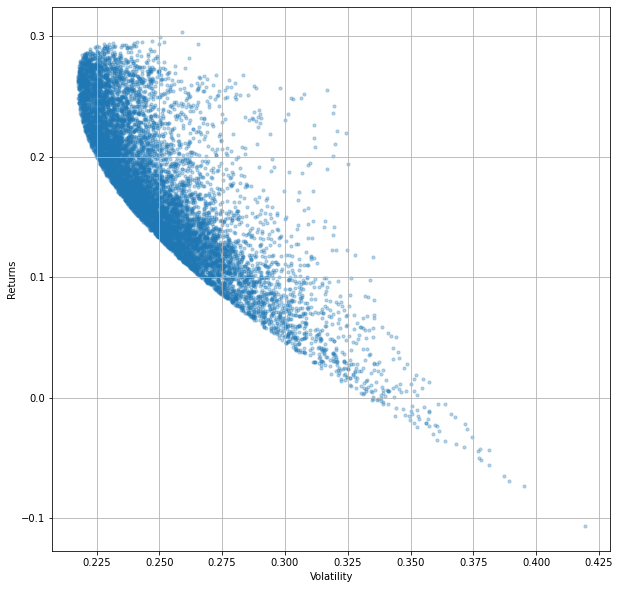

In [35]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [36]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                 0.262338
Volatility              0.217546
ICICIBANK.NS weight     0.220596
INFY.NS weight          0.262483
TATAMOTORS.NS weight    0.048366
TCS.NS weight           0.468555
Name: 6500, dtype: float64

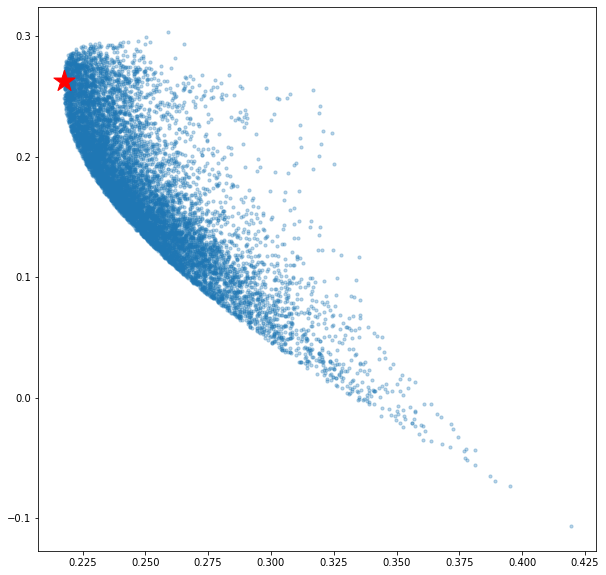

In [37]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

Sharpe Ratio formula
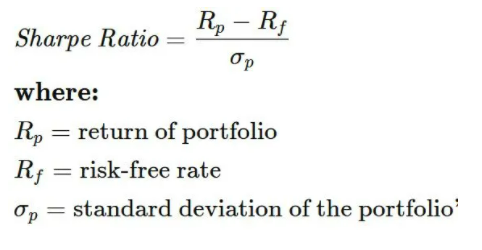

In [38]:
# Finding the optimal portfolio
rf = 0.05 # risk free rate
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                 0.289296
Volatility              0.222290
ICICIBANK.NS weight     0.159455
INFY.NS weight          0.423071
TATAMOTORS.NS weight    0.001482
TCS.NS weight           0.415992
Name: 7404, dtype: float64

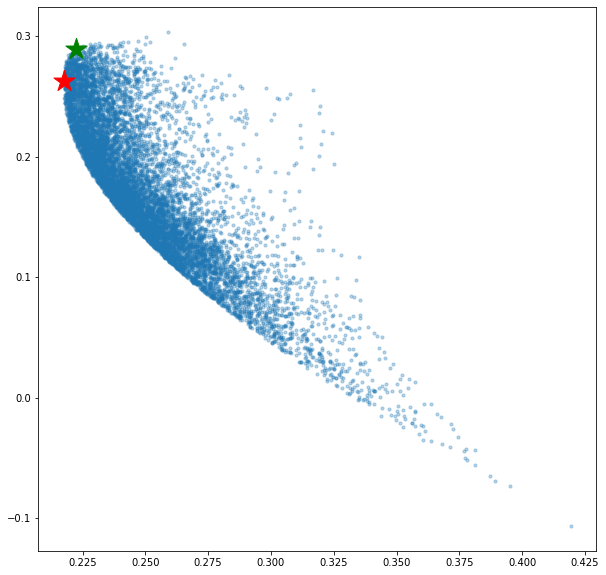

In [39]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [40]:
const_portfolio = portfolios[portfolios["Volatility"] < 0.25]
const_portfolio.reset_index(inplace=True)
const_portfolio

,index,Returns,Volatility,ICICIBANK.NS weight,INFY.NS weight,TATAMOTORS.NS weight,TCS.NS weight
0,0,0.150707,0.241947,0.091720,0.238505,0.311523,0.358252
1,1,0.203205,0.229558,0.248718,0.316231,0.183996,0.251055
2,3,0.185065,0.237102,0.155194,0.427245,0.239457,0.178104
3,5,0.195873,0.234051,0.305289,0.229817,0.190984,0.273910
4,8,0.169310,0.237910,0.233469,0.201084,0.255531,0.309916
...,...,...,...,...,...,...,...
5674,9994,0.263349,0.221075,0.201525,0.134576,0.039950,0.623949
5675,9995,0.180222,0.243635,0.334150,0.228181,0.224214,0.213454
5676,9996,0.283778,0.219408,0.194254,0.352675,0.007045,0.446026
5677,9998,0.259110,0.229322,0.205550,0.003579,0.041451,0.749420


In [41]:
const_portfolio.iloc[const_portfolio['Returns'].idxmax()]

index                   337.000000
Returns                   0.296061
Volatility                0.246905
ICICIBANK.NS weight       0.199232
INFY.NS weight            0.734708
TATAMOTORS.NS weight      0.001508
TCS.NS weight             0.064552
Name: 189, dtype: float64

In [42]:
const_portfolio = portfolios[portfolios["Returns"] > 0.25]
const_portfolio.reset_index(inplace=True)
const_portfolio

,index,Returns,Volatility,ICICIBANK.NS weight,INFY.NS weight,TATAMOTORS.NS weight,TCS.NS weight
0,9,0.275204,0.222043,0.333612,0.238887,0.008577,0.418924
1,12,0.255554,0.229010,0.074943,0.533934,0.091744,0.299379
2,14,0.286588,0.225585,0.139644,0.498900,0.013773,0.347682
3,29,0.271313,0.226722,0.308490,0.438334,0.031379,0.221796
4,41,0.263200,0.218090,0.164107,0.303480,0.053393,0.479020
...,...,...,...,...,...,...,...
1222,9979,0.275052,0.224586,0.241518,0.475240,0.030449,0.252794
1223,9983,0.280063,0.228318,0.234557,0.533675,0.023088,0.208680
1224,9994,0.263349,0.221075,0.201525,0.134576,0.039950,0.623949
1225,9996,0.283778,0.219408,0.194254,0.352675,0.007045,0.446026


In [43]:
const_portfolio.iloc[const_portfolio['Volatility'].idxmin()]

index                   6500.000000
Returns                    0.262338
Volatility                 0.217546
ICICIBANK.NS weight        0.220596
INFY.NS weight             0.262483
TATAMOTORS.NS weight       0.048366
TCS.NS weight              0.468555
Name: 809, dtype: float64